In [10]:
import cv2
import numpy as np
from PIL import Image

In [87]:
def break_expression(expression):
    chars = expression.split(' ')
    ops = ['not', '.', '+','^']
    operators = []
    for ch in chars:
        if ch in ops:
            operators.append(ch)
            chars.remove(ch)
    chars.remove(')')
    chars.remove('(')
    operand1 = chars[0]
    operand2 = chars[1]
    return operand1,operand2,operators

In [98]:
def get_gate_design(expression):
    
    operand1,operand2,operators = break_expression(expression)
    
    blank = np.ones((255,255,3),dtype = np.uint8)*255
    and_gate = cv2.resize(cv2.imread('and.png'),(100,100))
    or_gate =  cv2.resize(cv2.imread('or.png'),(100,100))
    xor_gate =  cv2.resize(cv2.imread('xor.png'),(100,100))
    nand_gate = cv2.resize(cv2.imread('nand.png'),(100,100))
    nor_gate =  cv2.resize(cv2.imread('nor.png'),(100,100))
    x_offset=y_offset=20
    if '.' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = and_gate
    if '+' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = or_gate
    if '^' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = xor_gate
    if 'not' in expression and '.' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = nand_gate
    if 'not' in expression and '+' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = nor_gate
        
    cv2.putText(blank,f'{operand1}',(20,15),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv2.putText(blank,f'{operand2}',(20,140),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv2.putText(blank,f'{expression}',(110,50),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    return blank

# SINGLE GATE LEVEL DESIGN

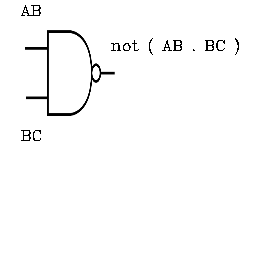

In [113]:
expression = 'not ( AB . BC )'
display(Image.fromarray(get_gate_design(expression)))

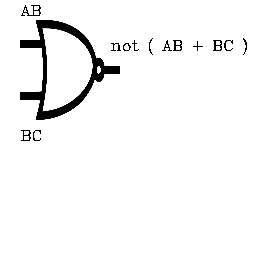

In [99]:
expression = 'not ( AB + BC )'
display(Image.fromarray(get_gate_design(expression)))

# MULTI GATE DESIGN

In [146]:
def split_expression(expression):
    expressions = []
    mid_ops = []
    ops = ['+', '.', '^']
    chars = expression.split(' ')
    for i in range(len(chars)):
        if chars[i] == '[':
            temp = ''
            for j in range(i+1,len(chars)):
                if chars[j]==']':
                    if chars[j+1] in ops:
                        mid_ops.append(chars[j+1])
                    break
                temp+=chars[j]
                temp+=' '
            expressions.append(temp[:-1])
    return expressions,mid_ops

In [324]:
def get_gate_design(expression,blank,position):
    
    operand1,operand2,operators = break_expression(expression)
    and_gate = cv2.resize(cv2.imread('and.png'),(100,100))
    or_gate =  cv2.resize(cv2.imread('or.png'),(100,100))
    xor_gate =  cv2.resize(cv2.imread('xor.png'),(100,100))
    nand_gate = cv2.resize(cv2.imread('nand.png'),(100,100))
    nor_gate =  cv2.resize(cv2.imread('nor.png'),(100,100))
    x_offset=20
    y_offset=position
    if '.' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = and_gate
    if '+' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = or_gate
    if '^' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = xor_gate
    if 'not' in expression and '.' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = nand_gate
    if 'not' in expression and '+' in expression:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = nor_gate
        
    cv2.putText(blank,f'{operand1}',(x_offset,y_offset-5),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv2.rectangle(blank,(x_offset-10,y_offset-20),(x_offset+250,y_offset+125),(0,0,0),2)
    cv2.putText(blank,f'{operand2}',(x_offset,120+y_offset),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv2.putText(blank,f'{expression}',(x_offset+80,y_offset+25),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    
    cv2.circle(blank,(x_offset+350,(y_offset+55)),3,(0,0,0),-1)
    cv2.circle(blank,(x_offset+250,(y_offset+55)),3,(0,0,0),-1)
    
    cv2.line(blank,(x_offset+350,(y_offset+55)),(x_offset+250,(y_offset+55)),(0,0,0),2)
    
    return blank

def multi_gate_design(expression):
    and_gate = cv2.resize(cv2.imread('and.png'),(100,100))
    or_gate =  cv2.resize(cv2.imread('or.png'),(100,100))
    xor_gate =  cv2.resize(cv2.imread('xor.png'),(100,100))
    nand_gate = cv2.resize(cv2.imread('nand.png'),(100,100))
    nor_gate =  cv2.resize(cv2.imread('nor.png'),(100,100))
    expressions,mid_ops = split_expression(expression)
    blank = np.ones((1080,1080,3),dtype=np.uint8)*255
    blank = get_gate_design(expressions[0],blank,30)
    blank = get_gate_design(expressions[1],blank,190)
    
    x_offset = 500
    y_offset = 120
    if '.' in mid_ops:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = and_gate
    if '+' in mid_ops:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = or_gate
    if '^' in mid_ops:
        blank[y_offset:y_offset+and_gate.shape[0], x_offset:x_offset+and_gate.shape[1]] = xor_gate
        
    cv2.rectangle(blank,(x_offset-10,y_offset-20),(x_offset+450,y_offset+125),(0,0,0),2)
    cv2.putText(blank,f'{expression}',(x_offset+80,y_offset+25),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    
    cv2.circle(blank,(x_offset-130,y_offset+30),3,(0,0,0),-1)
    cv2.circle(blank,(x_offset-10,y_offset+30),3,(0,0,0),-1)
    cv2.line(blank, (x_offset-130,y_offset+30), (x_offset-10,y_offset+30), (0,0,0), 2) 
    cv2.line(blank, (x_offset-130,y_offset+30), (x_offset-130,y_offset-35), (0,0,0), 2)
    
    cv2.circle(blank,(x_offset-130,y_offset+80),3,(0,0,255),-1)
    cv2.circle(blank,(x_offset-10,y_offset+80),3,(0,0,255),-1)
    cv2.line(blank, (x_offset-130,y_offset+80), (x_offset-10,y_offset+80), (0,0,0), 2)  
    cv2.line(blank, (x_offset-130,y_offset+80), (x_offset-130,y_offset+125), (0,0,0), 2)
    
    return blank


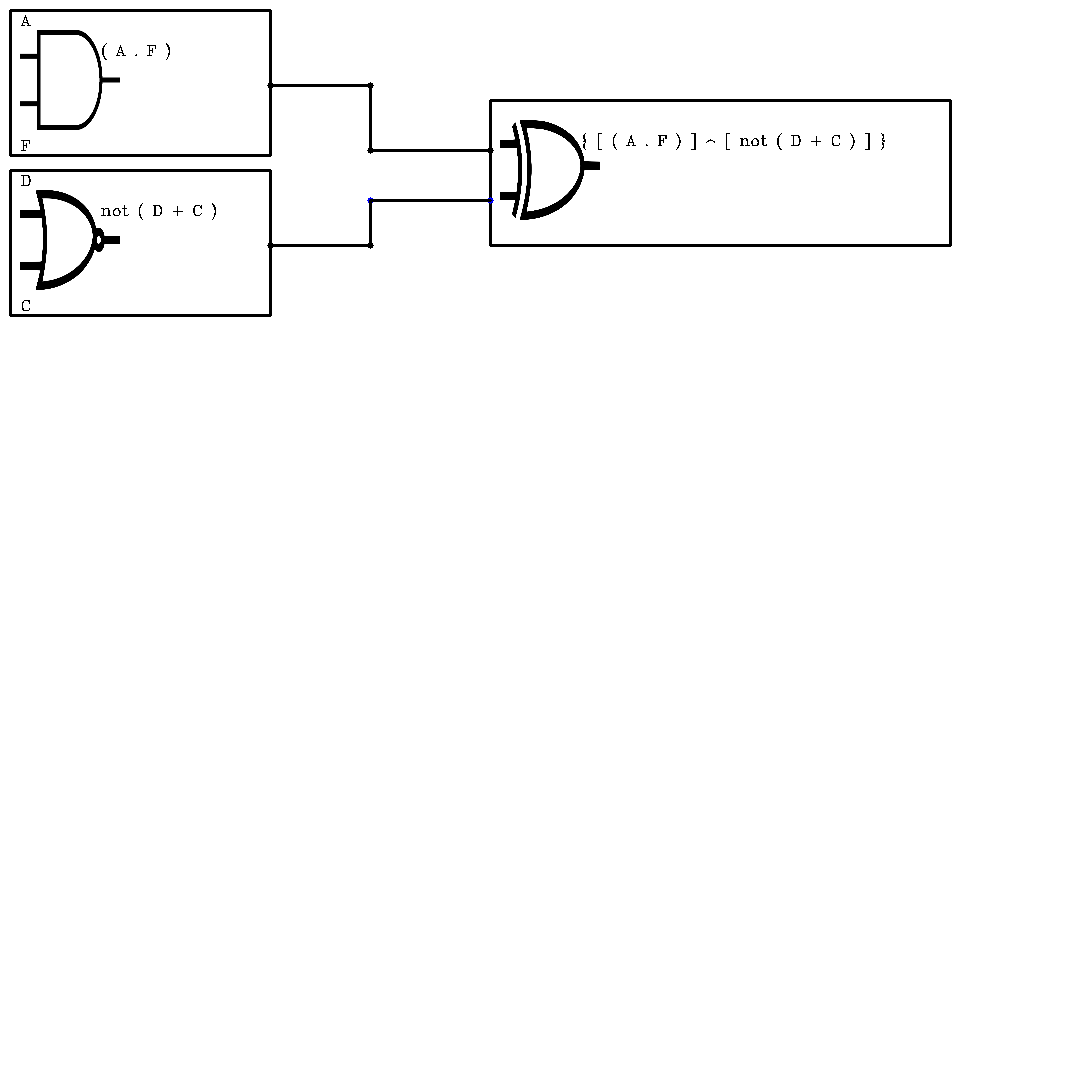

In [329]:
expression = '{ [ ( A . F ) ] ^ [ not ( D + C ) ] }'
display(Image.fromarray(multi_gate_design(expression)))